# Выход игроков из онлайн игры

### Импортируем основные библиотеки

In [1]:
import pandas as pd;
import random
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (11,5)
from sklearn.model_selection import GridSearchCV

### Загружаем данные

In [2]:
df = pd.read_csv('online_game.csv',sep = ',')

In [3]:
df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0


### maxPlayerLevel - максимальный уровень игры, который прошел игрок  
### numberOfAttemptedLevels - количество уровней, которые попытался пройти игрок
### attemptsOnTheHighestLevel - число попыток, сделанных на самом высоком уровне
### totalNumOfAttempts - общее число попыток
### averageNumOfTurnsPerCompletedLevel - среднее количество ходов, выполненных на успешно пройденных уровнях
### doReturnOnLowerLevels - делал ли игрок возвраты к игре на уже пройденных уровнях
### numberOfBoostersUsed - количество использованных бустеров
### fractionOfUsefullBoosters - количество бустеров, использованных во время успешных попыток (игрок прошел уровнь)
### totalScore - общее количество набранных очков
### totalBonusScore - общее количество набранных бонусных очков
### totalStarsCount - общее количество набранных звезд
### numberOfDaysActuallyPlayed - количество дней, когда пользователь играл в игру

### В этой задаче необходимо научиться предсказывать, остается ли участник в онлайн игре или уходит из нее. Уходом считается отсутствие его в игре в течение недели.

### Предварительный анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25289 entries, 0 to 25288
Data columns (total 13 columns):
maxPlayerLevel                        25289 non-null int64
numberOfAttemptedLevels               25289 non-null int64
attemptsOnTheHighestLevel             25289 non-null int64
totalNumOfAttempts                    25289 non-null int64
averageNumOfTurnsPerCompletedLevel    25289 non-null float64
doReturnOnLowerLevels                 25289 non-null int64
numberOfBoostersUsed                  25289 non-null int64
fractionOfUsefullBoosters             25289 non-null float64
totalScore                            25289 non-null int64
totalBonusScore                       25289 non-null int64
totalStarsCount                       25289 non-null int64
numberOfDaysActuallyPlayed            25289 non-null int64
target                                25289 non-null int64
dtypes: float64(2), int64(11)
memory usage: 2.5 MB


In [5]:
df.describe()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
count,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,25289.000000,2.528900e+04,25289.000000,25289.000000,25289.000000,25289.000000
mean,18.424888,12.415991,3.507612,26.841393,13.330451,0.152438,4.901222,0.534841,2.884268e+06,2138.215232,26.884495,2.725058,0.288189
std,20.172964,12.991894,6.766648,39.993029,6.657224,0.359452,6.630469,0.402091,3.415374e+06,2169.987109,29.403565,2.765350,0.452928
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,4.000000,3.000000,1.000000,4.000000,8.400000,0.000000,0.000000,0.000000,4.830000e+05,575.000000,6.000000,1.000000,0.000000
50%,11.000000,8.000000,1.000000,12.000000,14.555556,0.000000,2.000000,0.619048,1.700000e+06,1500.000000,18.000000,1.000000,0.000000
75%,27.000000,16.000000,3.000000,31.000000,17.720000,0.000000,6.000000,1.000000,3.890000e+06,2875.000000,37.000000,3.000000,1.000000
max,146.000000,142.000000,186.000000,563.000000,40.000000,1.000000,81.000000,1.000000,3.133800e+07,24275.000000,319.000000,14.000000,1.000000


In [6]:
df['target'].value_counts()

0    18001
1     7288
Name: target, dtype: int64

### Распределение классов на графике

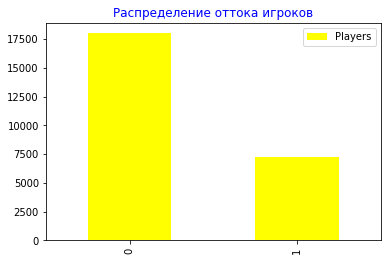

In [7]:
df['target'].value_counts().plot(kind='bar', label='Players', color='yellow')
plt.legend()
plt.title('Распределение оттока игроков',color='blue');

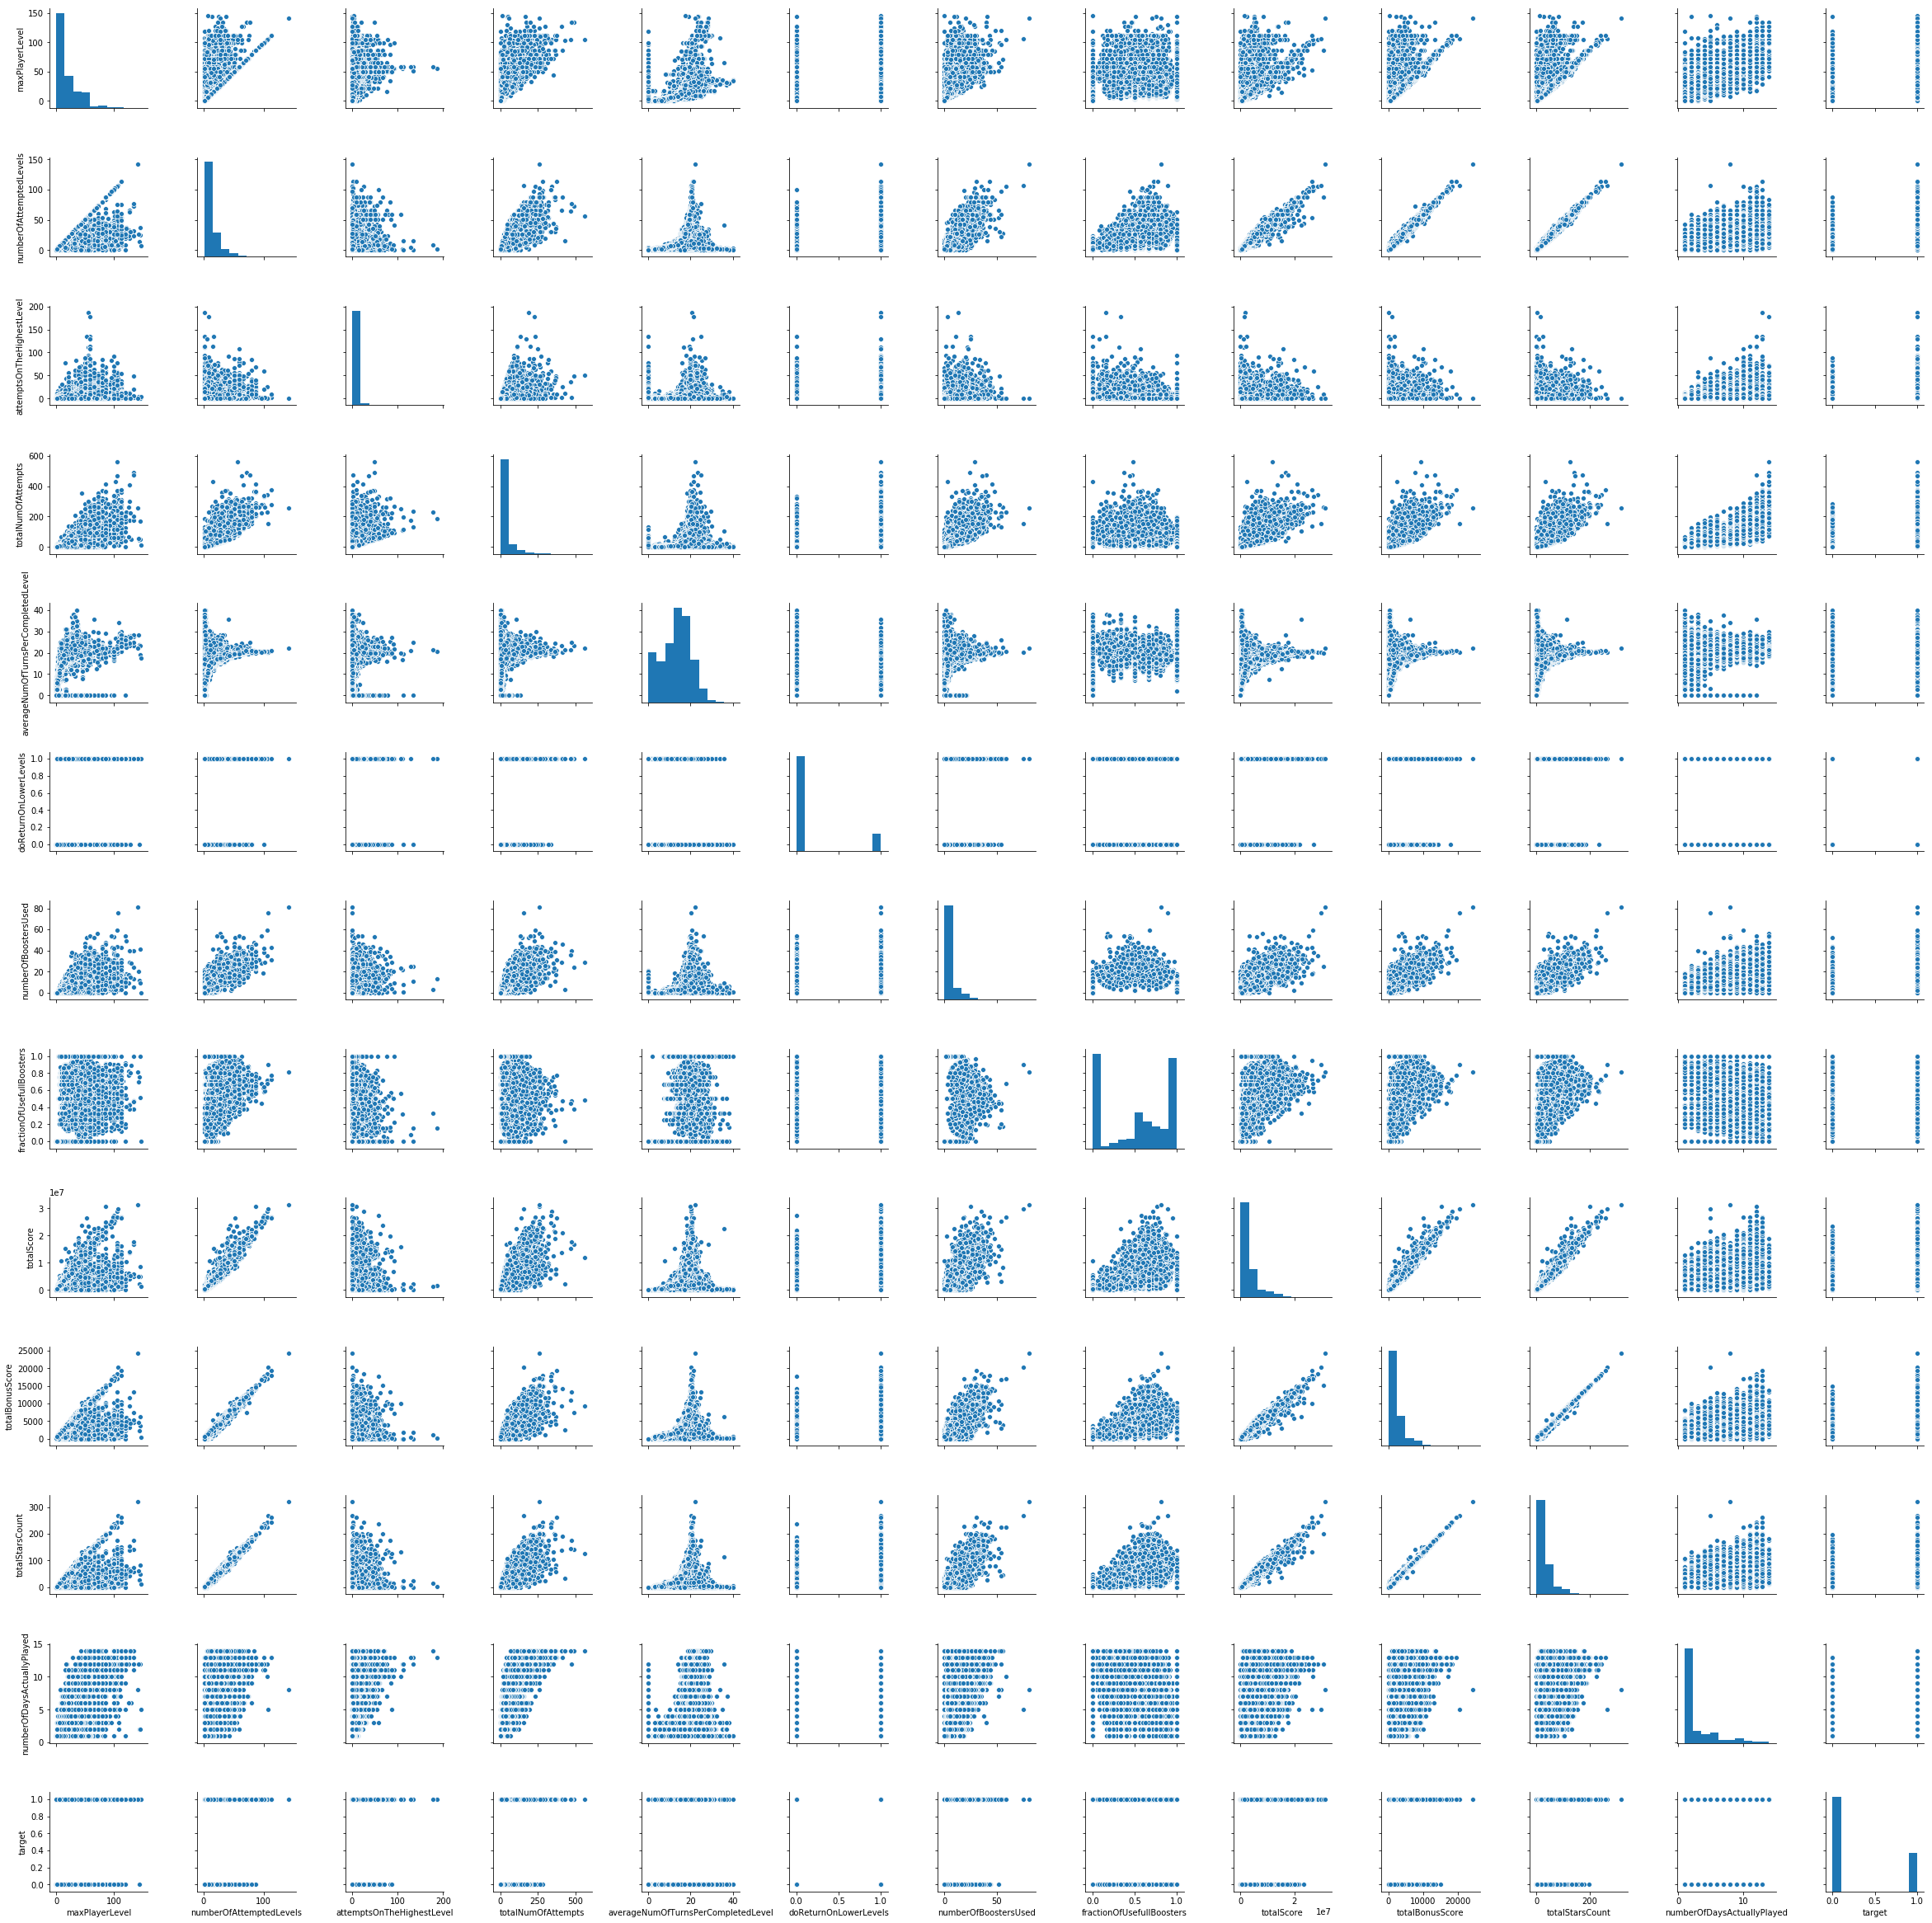

In [38]:
cols = df.columns
sns_plot = sns.pairplot(df[cols])

### Задаём признаки и ответы

In [21]:
X=df.iloc[:,:-1]
y=df.iloc[:,[-1]]

### Стандартизация данных

In [9]:
from sklearn.preprocessing import scale, normalize

In [10]:
X_Standarded=scale(X)
normalized_X = normalize(X)

### Логистическая регрессия

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.linear_model import LogisticRegression

#### Логистическая регрессия(признаки без стандартизации)

In [22]:
np.mean(cross_val_score(LogisticRegression(), X, y, cv=10, scoring='precision'))

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

0.5854980519544039

#### Логистическая регрессия(стандартизованные признаки)

In [23]:
LR_clf = GridSearchCV(LogisticRegression(), {'penalty':('l1','l2'),'C': np.arange(0.1,5,0.1)}, cv=5, scoring='precision')
LR_clf.fit(X_Standarded, y)

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'penalty': ('

In [25]:
LR_clf.best_params_

{'C': 0.2, 'penalty': 'l1'}

In [24]:
LR_clf.score(X_Standarded,y)

0.7648725212464589

In [15]:
np.mean(cross_val_score(LogisticRegression(penalty='l1',C=0.2), X_Standarded, y, cv=10, scoring='precision'))

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

0.8226503829777808

In [37]:
LR=LogisticRegression(penalty='l1',C=0.2)
LR.fit(X_Standarded,y)
print(LR.coef_)
print(LR.intercept_ )

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.29092354  0.21914806  0.00709352  0.06396988  0.42879441 -0.08940222
  -0.33262374  0.          0.01352291 -2.13222598  2.49184449  0.98936089]]
[-1.17688737]


### SVM

In [36]:
from sklearn.svm import SVC

In [ ]:
SVC_GS = GridSearchCV(SVC(), {'C': np.arange(0.1,10,0.1)}, cv=5, scoring='precision')
SVC_GS.fit(X_Standarded, y)

In [ ]:
SVC_GS.best_params_

In [ ]:
SVC_GS.score(X_Standarded,y)

In [17]:
np.mean(cross_val_score(SVC(C=3), X_Standarded, y))

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y wa

0.8280279785758461

### Knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1,15,1)}, cv=5, scoring='precision')
clf.fit(X_Standarded, y)

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_val

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_val

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_val

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
clf.best_params_

{'n_neighbors': 14}

In [118]:
clf.score(X_Standarded,y)

0.8377555458895172

### Дерево решений

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
DTclf=DecisionTreeClassifier()
search=GridSearchCV(DTclf,{'max_depth': np.arange(1,11),'min_samples_split':np.arange(2,11),'min_samples_leaf':np.arange(1,11)}, scoring='precision')
search.fit(X_Standarded, y)
best_tree=search.best_estimator_
search.best_params_

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [222]:
search.score(X_Standarded,y)

0.8307169124915972

In [28]:
tree=DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=2)
tree.fit(X_Standarded, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

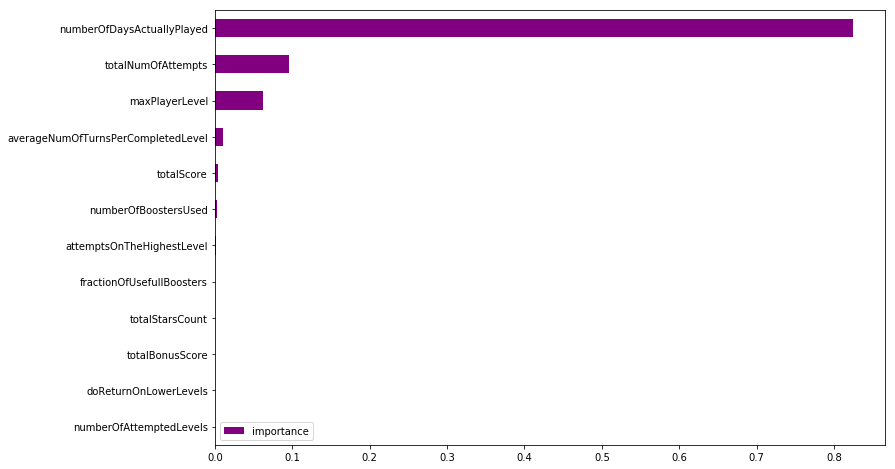

In [24]:
imp = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8),color='purple')

In [185]:
from sklearn.metrics import confusion_matrix
predictions=best_tree.predict(X)
conf_matrix=confusion_matrix(y,predictions)
conf_matrix

array([[16509,  1492],
       [ 2789,  4499]], dtype=int64)

In [225]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("precision_score - ",precision_score(y, predictions))
print("recall_score - ",recall_score(y, predictions))
print("accuracy_score - ",accuracy_score(y, predictions))

precision_score -  0.7509597729928226
recall_score -  0.6173161361141603
accuracy_score -  0.8307169124915972


### Корреляция признаков

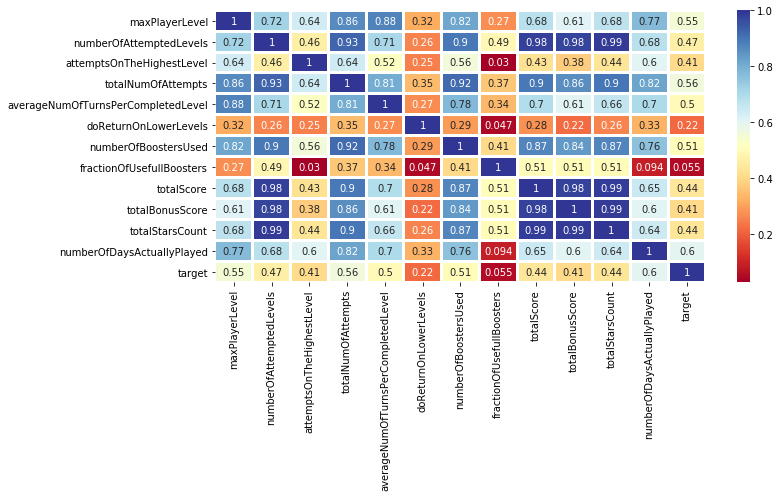

In [231]:
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, linewidths=2, cmap='RdYlBu');

In [32]:
X_new=X.drop(['numberOfAttemptedLevels', 'totalBonusScore','totalStarsCount','totalNumOfAttempts','averageNumOfTurnsPerCompletedLevel','numberOfBoostersUsed','totalScore','maxPlayerLevel','attemptsOnTheHighestLevel'], axis=1)

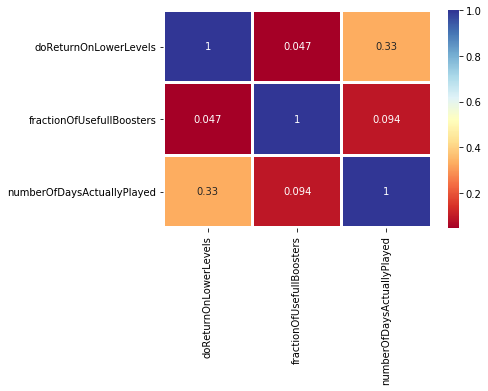

In [31]:
corr_matrix = X_new.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True,linewidths=2, cmap='RdYlBu');

In [33]:
X_Standarded_2=scale(X_new)

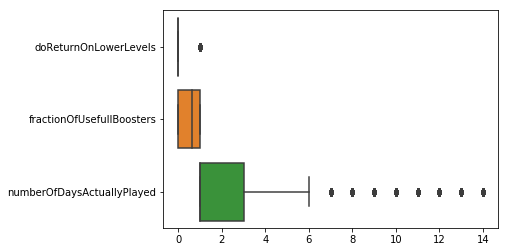

In [50]:
sns.boxplot(data=X_new, orient="h")

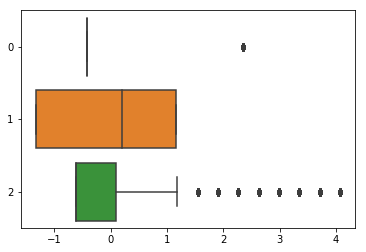

In [49]:
sns.boxplot(data=X_Standarded_2, orient="h")

In [34]:
np.mean(cross_val_score(LogisticRegression(), X_Standarded_2, y, cv=10, scoring='precision'))

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:

0.7802462376322009

In [37]:
np.mean(cross_val_score(SVC(), X_Standarded_2, y, cv=3, scoring='precision'))

C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda\Anaconda\envs\P36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

0.7384618381487581